In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error

In [2]:
#df_m = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_measured_varying_length.csv',header=None)
#df_r = pd.read_csv('https://raw.githubusercontent.com/simsekergun/Resolution/main/Es_true_varying_length.csv',header=None)
df_m = pd.read_csv('Es_measured_varying_length.csv',header=None)
df_r = pd.read_csv('Es_true_varying_length.csv',header=None)
df_r = df_r.fillna(0)
df_m = df_m.fillna(0)
df_m.shape, df_r.shape

((2330, 200), (2330, 400))

In [3]:
df_mmax = max(df_m.max())
df_rmax = max(df_r.max())
X = df_m/df_mmax
y = df_r/df_rmax

In [4]:
df_mmax,df_rmax

(488.53, 464.14)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_train.shape, X_test.shape, y_train.shape

((1631, 200), (699, 200), (1631, 400))

In [18]:
Ns = [50 ,100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 275, 300, 350, 400, 450, 500, 550, 600, 800, 1000, 1200, 1400, 1600]

In [19]:
mean_errors = np.zeros(len(Ns))
for i in range(len(Ns)):
  reg = LinearRegression()         # Instantiate
  reg.fit(X_train[:Ns[i]], y_train[:Ns[i]])        # Fit the train data
  y_pred = reg.predict(X_test)
  #mean_errors[i] = get_mean_error(y_pred, y_test)
  mean_errors[i] = mean_squared_error(y_pred, y_test)
#Normalizer = max(y_test.max(axis=1))**2  
#max_errors = mean_errors/Normalizer


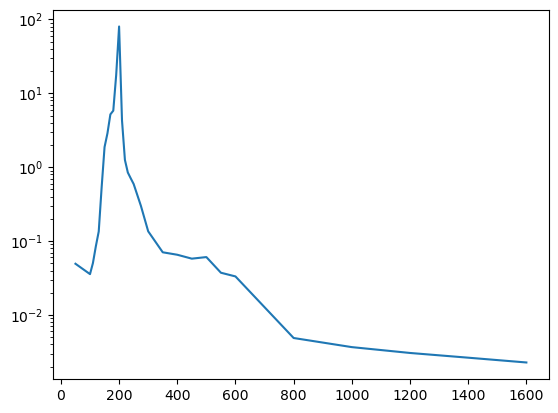

In [20]:
plt.plot(Ns,mean_errors)
plt.yscale("log")
plt.show()

In [21]:
mean_errors

array([4.93754208e-02, 3.57421653e-02, 5.03704552e-02, 8.48061421e-02,
       1.34982209e-01, 5.33877593e-01, 1.87055107e+00, 2.87658707e+00,
       5.17733030e+00, 5.81590849e+00, 1.76748843e+01, 8.00712731e+01,
       4.28918444e+00, 1.25348512e+00, 8.47155948e-01, 7.06258080e-01,
       5.92160035e-01, 2.99417677e-01, 1.35632583e-01, 7.05573721e-02,
       6.53504569e-02, 5.78629816e-02, 6.07841181e-02, 3.73223965e-02,
       3.32642974e-02, 4.88604707e-03, 3.67822834e-03, 3.06586536e-03,
       2.64650790e-03, 2.27957677e-03])

In [10]:
#from google.colab import files
#df_errors = pd.DataFrame(max_errors)
#df_errors.to_csv('LinRegr_df_errors.csv')

In [11]:
pd.DataFrame(y_pred).to_csv('LR_predictions.csv')
y_test.to_csv('LR_true_vals.csv')
X_test.to_csv('LR_inputs.csv')